<a href="https://colab.research.google.com/github/dvircohen0/projects/blob/main/homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In 2-3 sentences explain your thought process to starting to tackle this problem.**

Ill explore the two datasets and look for a similar feature in both so I can merge the two of them according to it. In our case the two datasets contain an address column
Ill look for anomalies in the dataset and fill in None values if necessary

**In a short paragraph explain step by step how one would go about combining the datasets.**

first ill read the file to pandas datframe using read_excel() and dbf5 functions.

datast 2 is containg a lot of duplicate adresses that contain the same lat and long values so first step will be to delete the duplicate values from dataset 2 (datset 1 can contain duplicate values since there can be the same adresse for diffrent apartment in a building) 

then ill use pandas inner join function to merge the long and lat values from dataset 2 to the coresponding adress in dataset 1





In [ ]:
!pip install geopandas
!pip install python-bidi
!pip install pyshp
!pip install simpledbf
!pip install adjustText

from adjustText import adjust_text
import pandas as pd
from simpledbf import Dbf5
from bidi import algorithm as bidialg
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from scipy.stats import mode

import geopandas as gpd
from shapely.geometry import Point, Polygon

!unzip "/content/Dataset 2.zip"

reading the first dataset

In [ ]:
dataset1 = pd.read_excel("Dataset 1.xlsx")
dataset1.head()

,ID,יום מכירה,מחיר,סוג נכס,ישוב,רחוב,מספר בית,שנת בניה,מספר קומות,כתובת,helek_nimkar,שטח,מספר חדרים,קומה,חניה,מחסן,גג,חצר,קוד ZIP,region_ID,yeshuv_ID,rehov_ID,ketovet_ID
0,006979-0005-207,2000-11-05 00:00:00,538000,דירת מגורים,תל אביב -יפו,יקותיאל,1.0,1950.0,3.0,"תל אביב -יפו,יקותיאל 1",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,5000.0,50002792.0,53794034.0
1,006979-0002-120,27/06/2000,307000,דירת מגורים,תל אביב -יפו,חפר,19.0,1951.0,2.0,"תל אביב -יפו,חפר 19",1,47.0,2.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,006979-0002-470,25/07/2000,155000,דירת מגורים,תל אביב -יפו,הודיה,19.0,1948.0,2.0,"תל אביב -יפו,הודיה 19",1,25.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,006979-0005-171,15/08/2000,203000,דירת מגורים,תל אביב -יפו,יקותיאל,1.0,1901.0,2.0,"תל אביב -יפו,יקותיאל 1",1,35.0,2.0,0.0,0.0,0.0,0.0,0.0,13.0,NaN,5000.0,50002792.0,53794034.0
4,006979-0010-000,2000-03-09 00:00:00,181000,דירת מגורים,תל אביב -יפו,חפר,23.0,NaN,NaN,"תל אביב -יפו,חפר 23",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,5.0,5000.0,50002705.0,53754209.0


reading the second one

In [ ]:
dbf = Dbf5('/content/Dataset 2/Dataset 2.dbf')
dataset2 = dbf.to_dataframe()
dataset2=dataset2.drop_duplicates(subset=['כתובת'])
dataset2.head()

,כתובת,lat,long
0,"תל אביב -יפו,יקותיאל 1",32.051571,34.787208
1,"תל אביב -יפו,חפר 19",32.051227,34.789321
2,"תל אביב -יפו,הודיה 19",32.051227,34.789321
4,"תל אביב -יפו,חפר 23",32.052315,34.789938
5,"תל אביב -יפו,ברכיה 1",32.053522,34.788641


using pandas inner join to filter the adresses that arent mutual to both datasets  

In [ ]:
combined = pd.merge(dataset1,dataset2,on='כתובת',how='inner')
print("original dataset has {} samples, joint dataset has {} samples".format(len(dataset1),len(combined)))
combined.head()

original dataset has 2664 samples, joint dataset has 2321 samples


,ID,יום מכירה,מחיר,סוג נכס,ישוב,רחוב,מספר בית,שנת בניה,מספר קומות,כתובת,helek_nimkar,שטח,מספר חדרים,קומה,חניה,מחסן,גג,חצר,קוד ZIP,region_ID,yeshuv_ID,rehov_ID,ketovet_ID,lat,long
0,006979-0005-207,2000-11-05 00:00:00,538000,דירת מגורים,תל אביב -יפו,יקותיאל,1.0,1950.0,3.0,"תל אביב -יפו,יקותיאל 1",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,5000.0,50002792.0,53794034.0,32.051571,34.787208
1,006979-0005-171,15/08/2000,203000,דירת מגורים,תל אביב -יפו,יקותיאל,1.0,1901.0,2.0,"תל אביב -יפו,יקותיאל 1",1,35.0,2.0,0.0,0.0,0.0,0.0,0.0,13.0,NaN,5000.0,50002792.0,53794034.0,32.051571,34.787208
2,006979-0005-029,2001-09-07 00:00:00,252000,דירת מגורים,תל אביב -יפו,יקותיאל,1.0,1950.0,1.0,"תל אביב -יפו,יקותיאל 1",1,44.0,2.0,0.0,0.0,0.0,0.0,0.0,13.0,NaN,5000.0,50002792.0,53794034.0,32.051571,34.787208
3,006979-0002-120,27/06/2000,307000,דירת מגורים,תל אביב -יפו,חפר,19.0,1951.0,2.0,"תל אביב -יפו,חפר 19",1,47.0,2.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,32.051227,34.789321
4,006979-0002-470,25/07/2000,155000,דירת מגורים,תל אביב -יפו,הודיה,19.0,1948.0,2.0,"תל אביב -יפו,הודיה 19",1,25.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,32.051227,34.789321


In [ ]:
combined.columns

Index(['ID', 'יום מכירה', 'מחיר', 'סוג נכס', 'ישוב', 'רחוב', 'מספר בית',
       'שנת בניה', 'מספר קומות', 'כתובת', 'helek_nimkar', 'שטח', 'מספר חדרים',
       'קומה', 'חניה', 'מחסן', 'גג', 'חצר', 'קוד ZIP', 'region_ID',
       'yeshuv_ID', 'rehov_ID', 'ketovet_ID', 'lat', 'long'],
      dtype='object')

**Are there any outliers in the database?**

Yes in some of the numerical features there are outliers, we can filter the top and bottom percentages values to get data that is more normally distributed .

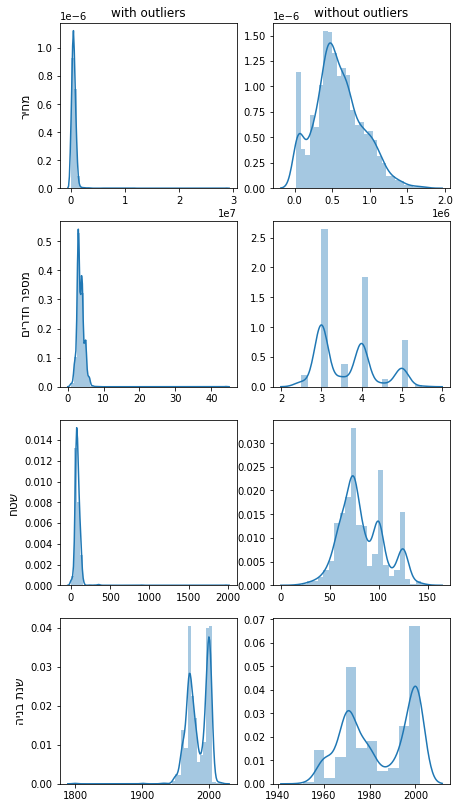

In [282]:


check_for_outlines = ['מחיר','מספר חדרים','שטח','שנת בניה']
columns_names = ["with outliers","without outliers"]
fig, ax =plt.subplots(len(check_for_outlines),2,figsize=(7,14))


for axi, col in zip(ax[0], columns_names):
    axi.set_title(col)

for axi, row in zip(ax[:,0], check_for_outlines):
    axi.set_ylabel(bidialg.get_display(row), rotation=90, size='large')

df = combined
 
for i,feature in enumerate(check_for_outlines):
  q_low = df[feature].quantile(0.01)
  q_hi  = df[feature].quantile(0.99)
  g=sns.distplot(df[feature],ax=ax[i,0]);

  g.set_xlabel('');
  df_filtered = df[(df[feature] < q_hi) & (df[feature] > q_low)]
  g=sns.distplot(df_filtered[feature],ax=ax[i,1]);
  df_filtered =pd.concat([df_filtered,df[df[feature].isnull()]])
  df = df_filtered
  g.set_ylabel('');
  g.set_xlabel('');



**What percentage of the data is usable?**

It depends on what features we use to make a prediction. We use about 75% of dataset 1 after the joining and outliers filtering operations, but if we need to use a feature containing None values, we may use a lower percentage if it is not possible to complete the missing data.

In [283]:
print('after deleting outlier, we satyed with {:.2} of the data'.format(len(filtered_combine)/len(dataset1)))

after deleting outlier, we satyed with 0.75 of the data


**Would you recommend removing any of the features**

Yes, the features: yard, roof and  warehouse contain mostly zero so they will notcontribute much to the prediciton. also ketovet_ID,rehov_ID,yeshuv_ID,region_ID,קוד ZIP not giving us usefull data for prediction

In [284]:
print(df['גג'].value_counts())
print(df['חצר'].value_counts())
print(df['מחסן'].value_counts())


0.0     1047
62.0       2
85.0       1
82.0       1
42.0       1
84.0       1
1.0        1
Name: גג, dtype: int64
0.0      1027
1.0         3
381.0       2
150.0       1
85.0        1
450.0       1
600.0       1
145.0       1
14.0        1
70.0        1
80.0        1
300.0       1
37.0        1
Name: חצר, dtype: int64
0.0    1054
Name: מחסן, dtype: int64


**How would you go about correcting the missing data?**

The floor feature can be filled with zeros for ground floor apartments
The parking feature can also be filled with zeros for missing values.

**Describe the breakdown of property types**

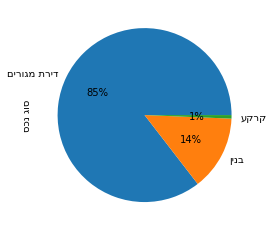

In [287]:
df['סוג נכס'].unique()
df['סוג נכס']=df['סוג נכס'].replace('ד. מגורים', 'דירת מגורים')
df['סוג נכס']=df['סוג נכס'].replace('בניין','בנין')

df['סוג נכס'] = [bidialg.get_display(x) for x in df['סוג נכס']]
df['סוג נכס'].str.get_dummies().sum().plot.pie(label=bidialg.get_display('סוג נכס'),autopct='%1.0f%%')


**Where do properties tend to have the biggest roof (גג)?**

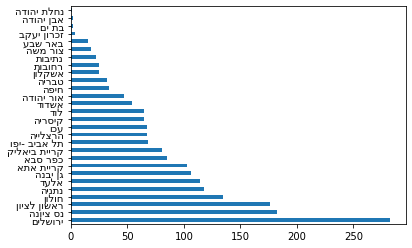

In [289]:
df["ישוב"] = [bidialg.get_display(x) for x in df["ישוב"]]
df["ישוב"].value_counts().plot(kind='barh')

**Describe when the majority of transactions occurred**

the day with the most is:  2001-06-12
in that date there were 10 trans


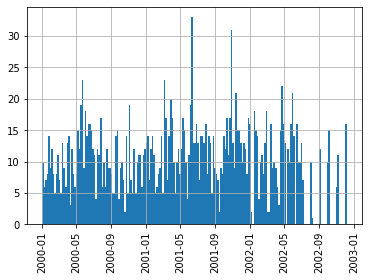

In [290]:
df["יום מכירה"]= pd.to_datetime(df["יום מכירה"])

df["יום מכירה"][df["יום מכירה"].dt.year < 2004].hist(bins=200)
plt.xticks(rotation='vertical');

df["יום מכירה"]= df["יום מכירה"].dt.date

print("the day with the most is: ",mode(df["יום מכירה"])[0][0])
print("in that date there were",mode(df["יום מכירה"]).count[0],"trans")

**Where do properties tend to have the biggest garden (חצר)?**

in Even yehuda the average size is about 500m

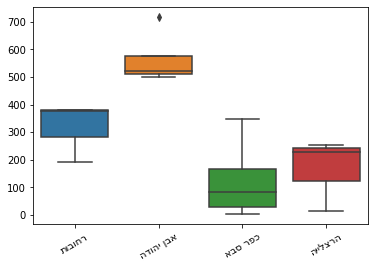

In [292]:
combined["ישוב"] = [bidialg.get_display(x) for x in combined["ישוב"]]
df=combined[combined.חצר>0 ]

df = df[df.groupby("ישוב")['ישוב'].transform('size') > 1]

g=sns.boxplot(x="ישוב", y="חצר",
                 data=df )

g.set_xticklabels(g.get_xticklabels(), rotation=30);
g.set_ylabel('');
g.set_xlabel('');

**Where do properties tend to have the biggest roof (גג)?**

all roof data is 0 or None

**Plot the coordinates of all the transactions on a map of Israel highlighting where prices are higher.**

In [ ]:
!wget https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_ISR_shp.zip
!unzip gadm36_ISR_shp.zip
!wget https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PSE_shp.zip
!unzip gadm36_PSE_shp.zip

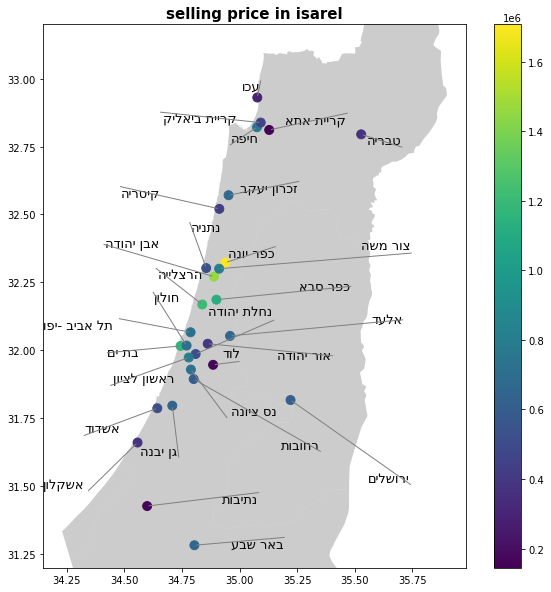

In [293]:
map1 = gpd.read_file('/content/gadm36_ISR_0.shp')
map2 = gpd.read_file('/content/gadm36_PSE_1.shp')

av_values =combined.groupby('ישוב').mean().reset_index()
geometry = [Point(xy) for xy in zip(av_values['long'], av_values['lat'])]
geo_df = gpd.GeoDataFrame(av_values,
 crs = "EPSG:4326",
 geometry = geometry)


fig, ax = plt.subplots(figsize=(10,10))

map1.plot(ax=ax,alpha=0.4,color="grey")
map2.plot(ax=ax,alpha=0.4,color="grey")

adjust_text(texts)
ax=geo_df.plot(column="מחיר",ax=ax, legend=True,markersize=80)
texts = []
for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df["ישוב"]):
    texts.append(plt.text(x, y, label, fontsize = 13, ha='center', va='center'))
adjust_text(texts, arrowprops=dict(arrowstyle="-",color='grey'))                           
plt.title("selling price in isarel", fontsize=15,fontweight="bold")

plt.ylim( 31.2,33.2)
plt.show()